
# Linear Regression Example
The example below uses only the first feature of the `diabetes` dataset,
in order to illustrate the data points within the two-dimensional plot.
The straight line can be seen in the plot, showing how linear regression
attempts to draw a straight line that will best minimize the
residual sum of squares between the observed responses in the dataset,
and the responses predicted by the linear approximation.

The coefficients, residual sum of squares and the coefficient of
determination are also calculated.


In [1]:
#copied mainly from https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the diabetes dataset
# To see what is returned by load_diabetes:
#     https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
# if return_X_y is False, it returns dictionary like "Bunch" data:
#   data, target, feature_names, frame (if as_frame = True), DESC, data_filename, target_filename

data_bunch = datasets.load_diabetes(return_X_y=False, as_frame=False)
diabetes_X = data_bunch ['data']
diabetes_y = data_bunch ['target']
print("Shape of X: ", diabetes_X.shape)
print("y = \n", diabetes_y)
print("Data description: \n", data_bunch['DESCR'])

# if return_X_y is True, it returns a tuple instead of "bunch":
#   X_data, y_target  #example call is shown below:
#   diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

Shape of X:  (442, 10)
y = 
 [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 17

In [4]:
print(diabetes_y.shape)

(442,)


In [6]:
print("X Full: \n", diabetes_X)
# Use only one feature
diabetes_X2 = diabetes_X[:, np.newaxis, 2] #extracts column [2], which is the 3rd column (BMI feature)
print("X with selected 1 feature: \n", diabetes_X2)

X Full: 
 [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
X with selected 1 feature: 
 [[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0

In [7]:
# Split the data into training/testing sets for one variable X2
diabetes_X_train = diabetes_X2[:-20] #SLICING. from def:0 to 20th last not incl.
diabetes_X_test = diabetes_X2[-20:] #from 20th last to def:N-1
print(diabetes_X_train.shape, diabetes_X_test.shape)

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

(422, 1) (20, 1)


In [ ]:
#Play with Slicing in python
# array that's a range for 0..(20-1)
a = np.arange(20)
print("\n Array is:\n ",a) #0..(20-1)
print("\n A[:] is: \n",a[:]) #0..(20-1)
print("\n A[:4] is: \n",a[:4]) #0..(4-1)
print("\n a[15]=",a[15]) #[15]
# a[start:stop:step]
print("\n a[-8:17:1] = ",a[-8:17:1])# -8 means index [20-8] to [17-1] increase by 1. 12..16
print("\n a[10:] = ",a[10:]) #10..(20-1)


 Array is:
  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

 A[:] is: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

 A[:4] is: 
 [0 1 2 3]

 a[15]= 15

 a[-8:17:1] =  [12 13 14 15 16]

 a[10:] =  [10 11 12 13 14 15 16 17 18 19]


In [9]:
# Create linear regression object
regr = linear_model.LinearRegression()
'''
Methods that can be found in linear_model.LinearRegression() object:
fit(X, y[, sample_weight]) #Fit linear model.
get_params([deep]) #Get parameters for this estimator.
predict(X) #Predict using the linear model.
score(X, y[, sample_weight]) #Return the coefficient of determination of the prediction.
set_params(**params) #Set the parameters of this estimator before calling "fit"
'''
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
print("R^2: %.2f" % regr.score(diabetes_X_train, diabetes_y_train))
diabetes_y_fitted = regr.predict(diabetes_X_train)
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_train, diabetes_y_fitted))

R^2: 0.34
Coefficient of determination: 0.34


In [10]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
n = diabetes_y_test.shape
# The coefficients including intercept
print("Coefficients: \n", regr.coef_, "+ ", regr.intercept_)
# The mean squared error
residue_square = mean_squared_error(diabetes_y_test, diabetes_y_pred)
residue = math.sqrt(residue_square)
print("Mean squared error and sqrt error: %.2f %.2f" % (residue_square, residue) )
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))
print("R^2: ", regr.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [938.23786125] +  152.91886182616113
Mean squared error and sqrt error: 2548.07 50.48
Coefficient of determination: 0.47
R^2:  0.47257544798227147


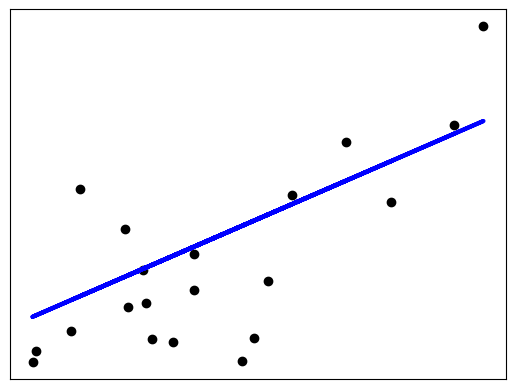

In [11]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [13]:
#use all 10 features x1..x10
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20] #[0:421], [0:441-20]
diabetes_X_test = diabetes_X[-20:] #[422:441], [a:b]. [:] -> [0:441]. [441-20:441]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create a linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients including intercept
print("Coefficients: \n", regr.coef_, "+ ", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))


Coefficients: 
 [ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01] +  152.76429169049118
Mean squared error: 2004.52
Coefficient of determination: 0.59
